In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics


In [ ]:
url='https://raw.githubusercontent.com/niloytanvir/heart-failure-data/main/Data/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
x = data.iloc[:,:-1].values
y = data['DEATH_EVENT']

In [ ]:
#x = x.reshape(x.shape[0], x.shape[1], 1)

In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.20, random_state=101)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(xtrain, ytrain)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.2s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
rf_RandomGrid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 72}

In [ ]:
pred_train=rf_RandomGrid.predict(xtrain)
pred_test=rf_RandomGrid.predict(xtest)

In [ ]:
train_acc = metrics.accuracy_score(ytrain, pred_train)
test_acc = metrics.accuracy_score(ytest, pred_test)
train_f1 = metrics.f1_score(ytrain, pred_train)
test_f1 = metrics.f1_score(ytest, pred_test)
train_recall = metrics.recall_score(ytrain, pred_train)
test_recall = metrics.recall_score(ytest, pred_test)
train_precision = metrics.precision_score(ytrain, pred_train)
test_precision = metrics.precision_score(ytest, pred_test)
train_loss = metrics.log_loss(ytrain, pred_train)
test_loss = metrics.log_loss(ytest, pred_test)

print(f'\nTrain Accuracy: {train_acc:.3f}')
print(f'\nTest Accuracy: {test_acc:.3f}')
print(f'\nTrain F1 Score: {train_f1:.3f}')
print(f'\nTest F1 Score: {test_f1:.3f}')
print(f'\nTrain recall Score: {train_recall:.3f}')
print(f'\nTest recall Score: {test_recall:.3f}')
print(f'\nTrain precision Score: {train_precision:.3f}')
print(f'\nTest precision Score: {test_precision:.3f}')
print(f'\nTrain loss Score: {train_loss:.3f}')
print(f'\nTest loss Score: {test_loss:.3f}')



Train Accuracy: 0.904

Test Accuracy: 0.917

Train F1 Score: 0.844

Test F1 Score: 0.828

Train recall Score: 0.765

Test recall Score: 0.800

Train precision Score: 0.939

Test precision Score: 0.857

Train loss Score: 3.324

Test loss Score: 2.878


In [ ]:
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix

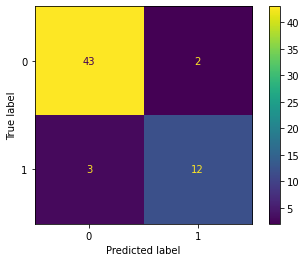

In [ ]:
plot_confusion_matrix(rf_RandomGrid, xtest, ytest)
plt.show() 

In [ ]:
r_probs = [0 for _ in range(len(ytest))]
rf_probs = rf_RandomGrid.predict_proba(xtest)


In [ ]:
rf_probs = rf_probs[:,1]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
r_auc = roc_auc_score(ytest,r_probs)
rf_auc = roc_auc_score(ytest,rf_probs)


In [ ]:
print('Random (chance) prediction: AUROC = %.3f' %(r_auc))
print('Random forest test: AUROC = %.3f' %(rf_auc))


Random (chance) prediction: AUROC = 0.500
Random forest test: AUROC = 0.961


In [ ]:
r_fpr , r_tpr, _ = roc_curve(ytest,r_probs)
rf_fpr , rf_tpr, _ = roc_curve(ytest,rf_probs)


<function matplotlib.pyplot.show>

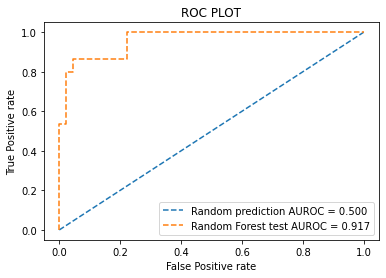

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction AUROC = %0.3f' %r_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest test AUROC = %0.3f' %test_acc)


plt.title('ROC PLOT')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show